# verificação da corretude do algoritmo Histograma para imagens coloridas
equipe: Jorge
        Mariana

## utilizando uma ferramenta para determinação
para verificar a corretude do nosso algoritmo, será comparado a resposta de saída do nosso algoritmo com os valores encontrado pela OpenCV

In [13]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2

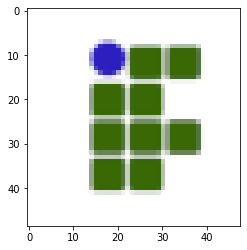

In [14]:
# load the image and show it
image = cv2.imread('logo.ppm')

plt.imshow(image)
#cv2.imshow("image", image)

In [15]:
#separete the 3 colors channels
(channel_b, channel_g, channel_r) = cv2.split(image)
histR = cv2.calcHist([channel_r], [0], None, [256], [0, 256])
#histR = histR.tolist()
histR = histR.flatten().astype(int) 
histG = cv2.calcHist([channel_g], [0], None, [256], [0, 256])
histG = histG.flatten().astype(int) 

histB = cv2.calcHist([channel_b], [0], None, [256], [0, 256])
histB = histB.flatten().astype(int) 

#print(histR)
print(histG.shape)
print(histG.dtype)
print(histG)

(256,)
int64
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    2   29    0    1    0    0    1    0    1    0    1    0    0
    0    0    0    0    1    0    0    0    0    0    0    1    1    0
    0    0    0    0    0    0    0    0    1    0    0    0    0    0
    0    0    1    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    1    0    0    0    0    0    0    0
    0    0    0    0    0   12  333   23    2    2   10    1    0    0
    0    2    0   15    1   11    2    0    0    1    1    1    0    0
    0    0    0    0    0    2   12    3    1    1    1    2    0    0
    0   14    1    1    0    1    1    0    1    0    0    0    0    1
    0    0    0    9    1    1    3    5    9    2    1    1    0    1
    0    1    0    0    1    1    0    0    1    1    0    1    1    0
    0    2    1   11    0    1    4    6    5    8    1    1    

## valores obtidos pelo nosso algoritmo
os valores obtidos ao rodar o código na Raspberry (ARM) geraram um output.txt
esse arquivo foi utilizado para comparação das saídas

abertura do arquivo

In [16]:
arq = open('Vetores_de_saida.txt', 'r')
file = arq.readlines()
vetor = []
for line in file :
    line = line.rstrip()
    vetor.append(line)
    #print(linha)
arq.close()

print("valores de saída \n")
print(vetor)

vector_r = vetor[0]
#print(type(vector_r))
vector_g = vetor[2]
vector_b = vetor[4]

vRed = vector_r.split()
vGreen = vector_g.split()
vBlue = vector_b.split()
#print(vGreen)    


valores de saída 

['0 0 0 0 1 340 0 1 2 1 0 0 0 0 0 0 0 0 1 19 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 9 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 9 2 4 0 1 1 1 0 8 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 12 2 1 0 1 1 0 0 1 1 0 0 0 0 1 14 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 9 0 1 0 1 2 0 1 0 2 3 8 2 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 3 0 7 3 3 6 1 2 3 8 1 0 1 10 1 0 0 1 0 5 1 1 2 1 5 44 6 2 0 1 3 1 1 3 0 1 1 1 3 0 0 1 6 1 4 1 0 1 2 2 1 0 2 1 10 2 4 5 4 2 0 0 1 1 0 0 1 1 0 0 0 2 3 3 1 2 1 5 3 0 9 4 3 2 0 1 12 10 5 1611', '', '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 29 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 12 333 23 2 2 10 1 0 0 0 2 0 15 1 11 2 0 0 1 1 1 0 0 0 0 0 0 0 2 12 3 1 1 1 2 0 0 0 14 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 9 1 1 3 5 9 2 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 2 1 11 0 1 4 6 5 8 1 1 0 10 2 0 4 2 1 3 6 1 0 0 0 11 5 2 0 3 2 2 2 0 5 

### observação
devido aos tipos diferentes de dados foram realizados alguns tratamentos de dados

In [17]:
red = []
for i in range(0, len(vRed)):
    x = int(vRed[i])
    red.append(x)

redA = np.asarray(red)


green = []
for i in range(0, len(vGreen)):
    x = int(vGreen[i])
    green.append(x)
print(green)
greenA = np.asarray(green)


blue = []
for i in range(0, len(vBlue)):
    x = int(vBlue[i])
    blue.append(x)

blueA = np.asarray(blue)

#print(greenA)
#print(greenA.shape)
#print(greenA.dtype)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 29, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 333, 23, 2, 2, 10, 1, 0, 0, 0, 2, 0, 15, 1, 11, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 12, 3, 1, 1, 1, 2, 0, 0, 0, 14, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 9, 1, 1, 3, 5, 9, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 11, 0, 1, 4, 6, 5, 8, 1, 1, 0, 10, 2, 0, 4, 2, 1, 3, 6, 1, 0, 0, 0, 11, 5, 2, 0, 3, 2, 2, 2, 0, 5, 2, 2, 1, 0, 0, 2, 2, 3, 1, 9, 6, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 1, 5, 3, 3, 1, 11, 3, 1, 1, 18, 9, 1608]


## comparação dos resultados

In [18]:
# o nparray poode ser comparado elemento a elemento da seguinte forma
# (A,B).all() - retornará True se TODOS os elementos forem iguais em valores e tipos
(redA==histR).all()


True

In [19]:
#determinando o desvio padrão do erro
errorR = redA - histR
print(errorR)
stdR = np.std(errorR)
print("desvio padrão para o Vermelho", stdR)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
desvio padrão para o Vermelho 0.0


In [20]:
#canal verde
(greenA==histG).all()

True

In [21]:
#desvio padrão
errorG = greenA - histG 
print(errorG)
stdG = np.std(errorG)
print("desvio padrão para o verde",stdG)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
desvio padrão para o verde 0.0


In [22]:
#canal azul
(blueA==histB).all()

True

In [23]:
#desvio padrão para o azul
errorB = blueA - histB 
print(errorB)
stdB = np.std(errorB)
print("desvio padrão para o azul",stdB)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
desvio padrão para o azul 0.0


## apresentação dos resultados de forma gráfica

flattened feature vector size: 768


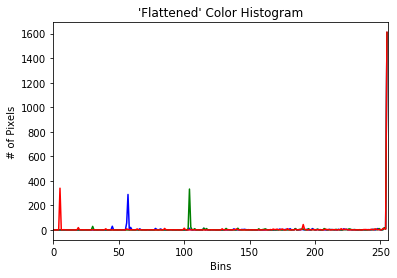

In [24]:
# grab the image channels, initialize the tuple of colors,
# the figure and the flattened feature vector
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []
 
# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and
	# concatenate the resulting histograms for each
	# channel
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	features.extend(hist)
 
	# plot the histogram
	plt.plot(hist, color = color)
	plt.xlim([0, 256])

# here we are simply showing the dimensionality of the
# flattened color histogram 256 bins for each channel
# x 3 channels = 768 total values --

print ("flattened feature vector size: %d" % (np.array(features).flatten().shape))

256


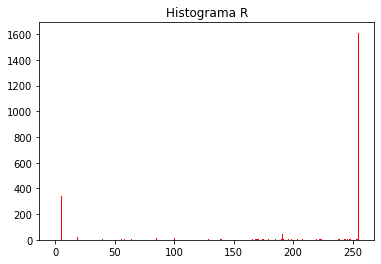

In [48]:
aux = []
for i in range(0,256):
    aux.append(i)
print(len(redA))
    
plt.bar(np.arange(len(redA)),redA,width=0.8,color='r')
plt.title("Histograma R") 
plt.show()


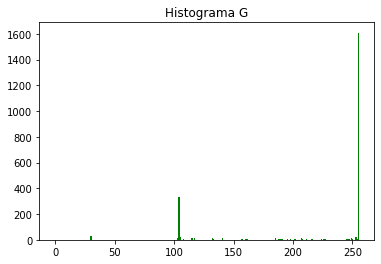

In [50]:
plt.bar(np.arange(len(greenA)),greenA,width=1,color='g')
plt.title("Histograma G") 
plt.show()


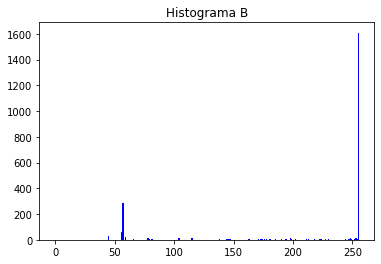

TypeError: Expected Ptr<cv::UMat> for argument '%s'

In [51]:
plt.bar(np.arange(len(blueA)),blueA,width=1,color='b')
plt.title("Histograma B") 
plt.show()
